# Iniciación en Python con Aplicaciones en Aceración (module 01)

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from scipy.optimize import fsolve
import deox # funciones propias

# 3. Equilibrio de desoxidación con Mg

## 3.1 Reacción de desoxidación con magnesio

La reacción de desoxidación con magnesio está data por:

$$\mathrm{\left( MgO\right) = \left[Mg\right] +  \left[O\right]}$$

cuya constante de equilibrio es:

$$K_{Mg} = \frac{h_{Mg}  h_{O}}{a_{MgO}}$$

$$ \log K_{Mg} = \log h_{Mg} + \log h_{O} - \log a_{MgO} $$


**Inclusión compleja con MgO (periclasa):**

La imagen debajo muestra que las inclusiones no necesariamente son compuestos puros.

- La fase obscura es 93% MgO.
- La fase clara es un aluminato de calcio.

[[Castro et al. 2015](https://link.springer.com/article/10.1007%2Fs11663-016-0640-y)].
![alt text](images/periclase1.png "Periclase")

## 2.2 Datos experimentales de equilibrio disponibles en la literatura

Debajo se grafican mediciones experimentales del equilibrio de desoxidación con aluminio, realizadas por diversos autores.

In [2]:
expList = ['MgO_Itoh1997.csv', 'MgO_Han1997.csv', 'MgO_Seo2000.csv']

In [3]:
# fill a dictionary with the experimental data
expDict = dict()

cwd = os.getcwd()
subDir = 'datasets'

for experiment in expList:
    filename = os.path.join(cwd, subDir, experiment)
    tag = experiment.strip("MgO_").strip(".csv")
    expDict[tag] = pd.read_csv(filename)

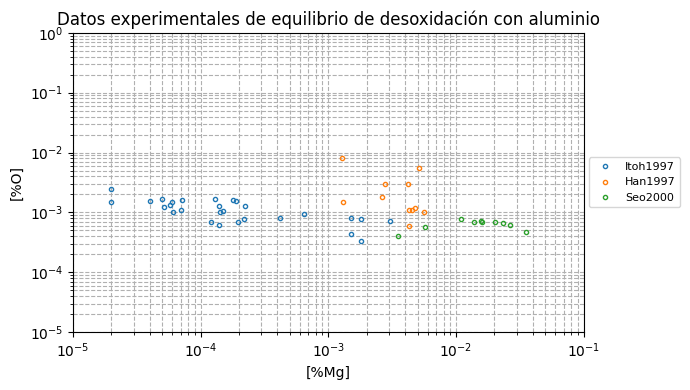

In [4]:
# plot experimental data
fig0, ax0 = plt.subplots(figsize=(7, 4))

for key in expDict.keys():
    x = expDict[key]['pctMg'].to_numpy()
    y = expDict[key]['pctO'].to_numpy()
    ax0.loglog(x, y, ls='', marker='.', markerfacecolor='None', label=key)

ax0.set_title('Datos experimentales de equilibrio de desoxidación con aluminio')
ax0.set(xlabel='[%Mg]', ylabel='[%O]',
        xscale='log', yscale='log',
        xlim=(1e-5, 1e-1), ylim=(1e-5, 1))
ax0.legend(ncol=1, loc='center left', fontsize=8, bbox_to_anchor=(1, 0.5))
ax0.grid(ls='--', which='both')
fig0.tight_layout()
plt.show()

## 2.3 Tratamiento termodinámico mediante formalismo de Wagner

Considerando el formalismo de parámetros de interacción de Wagner se tiene:

$$ \log K_{Mg} = \log f_{Mg} + \log \left[\%Mg\right] +  \log f_{O} +  \log \left[\%O \right] - \log a_{MgO} $$

$$ \log K_{Mg} = -\frac{4700}{T} - 4.28 $$

In [5]:
def logK_Mg(T):
    return -4700/T -4.28 

donde:

$ \log f_{Mg} = e_{Mg}^{Mg} \left[\%Mg\right] + e_{Mg}^{O} \left[\%O\right] + r_{Mg}^{Mg} \left[\%Mg\right]^2 + r_{Al}^{O} \left[\%O\right]^2 + r_{Mg}^{Mg,O} \left[\%Mg\right]\left[\%O\right] $

$\log f_{O} = e_{O}^{Mg} \left[\%Mg\right] + e_{O}^{O} \left[\%O\right] + r_{O}^{Mg} \left[\%Mg\right]^2 + r_{O}^{O} \left[\%O\right]^2 + r_{O}^{Mg,O} \left[\%Mg\right]\left[\%O\right] $

### 2.3.1 Parámetros de interacción de 1er orden

$$\begin{bmatrix} e_{Mg}^{Mg} \\  \\ e_{Mg}^{O} \\ \\ e_{O}^{Mg} \\ \\  e_{O}^{O} \end{bmatrix}  = \begin{bmatrix} 0 \\ \\ 958 - \frac{2.56\times10^6}{T} \\ \\ 630 - \frac{1.705\times10^6}{T}  \\  \\ 0.76 - \frac{1750}{T} \end{bmatrix}$$

In [6]:
def e_Mg_Mg(T):
    return 0

def e_Mg_O(T):
    return 958 -2.592e6/T

def e_O_Mg(T):
    return 630 - 1.705e6/T

def e_O_O(T):
    return 0.76 - 1750/T

### 2.3.2 Parámetros de interacción de 2do orden

$$\begin{bmatrix} r_{Mg}^{Mg} \\  \\ r_{Mg}^{O} \\ \\ r_{O}^{Mg} \\ \\  r_{O}^{O} \end{bmatrix}  = \begin{bmatrix} 0 \\ \\ -1.904\times10^6 + \frac{4.22\times10^{9}}{T} \\ \\ 7.05\times10^4 - \frac{1.696\times10^8}{T}  \\  \\ 0 \end{bmatrix}$$

In [7]:
def r_Mg_Mg(T):
    return 0

def r_Mg_O(T):
    return -1.904e6 + 4.22e9/T

def r_O_Mg(T):
    return 7.05e4 -1.696e8/T

def r_O_O(T):
    return 0 

$$\begin{bmatrix} r_{Mg}^{Mg,O} \\  \\ r_{O}^{Mg,O}\end{bmatrix}  = \begin{bmatrix} 2.143\times10^5 - \frac{5.156\times10^8}{T} \\ \\  -2.513\times10^6 + \frac{5.573\times10^{9}}{T}\end{bmatrix}$$

In [8]:
def r_Mg_MgO(T):
    return 2.143e5 - 5.156e8/T

def r_O_MgO(T):
    return -2.513e6 + 5.573e9/T

### 2.3.3 Efecto de parámetros de interacción sobre los coeficientes de actividad

In [9]:
# parámetros de entrada
T  = 1873
Mg = np.logspace(-5, -1, 800)
O  = np.logspace(-4, -2, 400)

In [10]:
# malla para cálculos
pctMg, pctO = np.meshgrid(Mg, O)
logMg = np.log10(pctMg)
logO = np.log10(pctO)


$ \log f_{Mg} = \underbrace{e_{Mg}^{Mg} \left[\%Mg\right] + e_{Mg}^{O} \left[\%O\right]}_{\mathrm{1er\,orden}} + \underbrace{r_{Mg}^{Mg} \left[\%Mg\right]^2 + r_{Al}^{O} \left[\%O\right]^2 + r_{Mg}^{Mg,O} \left[\%Mg\right]\left[\%O\right] }_{\mathrm{2do\,orden}}$

$\log f_{O} = \underbrace{e_{O}^{Mg} \left[\%Mg\right] + e_{O}^{O} \left[\%O\right]}_{\mathrm{1er\,orden}} + \underbrace{r_{O}^{Mg} \left[\%Mg\right]^2 + r_{O}^{O} \left[\%O\right]^2 + r_{O}^{Mg,O} \left[\%Mg\right]\left[\%O\right] }_{\mathrm{2do\,orden}}$

In [11]:
# cálculo de contribución de coeficientes de 1er orden
log_fMg1 = deox.e('Mg,Mg',T)*pctMg + deox.e('Mg,O',T)*pctO
log_fO1 = deox.e('O,Mg', T)*pctMg + deox.e('O,O', T)*pctO

In [12]:
# cálculo de contribución de coeficientes de 2do order
log_fMg2 = deox.r('Mg,Mg',T)*pctMg**2 + deox.r('Mg,O',T)*pctO**2 + deox.r('Mg,MgO',T)*pctMg*pctO
log_fO2 = deox.r('O,Mg',T)*pctMg**2 + deox.r('O,O',T)*pctO**2 + deox.r('O,MgO',T)*pctMg*pctO

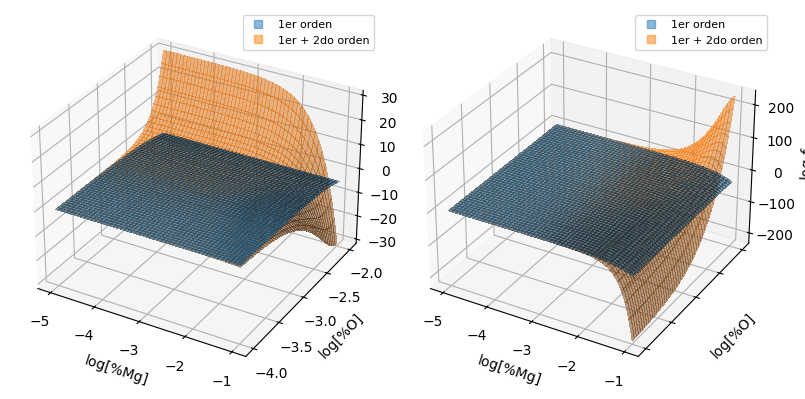

In [13]:
# gráficos de superficie de respuesta en 3D
fig1, ax1 = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4), subplot_kw={"projection":"3d"})

# efecto de coefs. de 1er orden
surf11 = ax1[0].plot_surface(logMg, logO, log_fMg1, linewidth=0, antialiased=False, alpha=0.5)
surf12 = ax1[1].plot_surface(logMg, logO, log_fO1, linewidth=0, antialiased=False, alpha=0.5)

# efecto de coefs. de 1er y 2do orden
surf21 = ax1[0].plot_surface(logMg, logO, log_fMg1+log_fMg2, linewidth=0, antialiased=False, alpha=0.5)
surf22 = ax1[1].plot_surface(logMg, logO, log_fO1+log_fO2, linewidth=0, antialiased=False, alpha=0.5)

## formato gráficos
ax1[0].set_zlabel(r'log $f_{Mg}$')
ax1[1].set_zlabel(r'log $f_{O}$')

for i in range(2):
    ax1[i].set(xlabel='log[%Mg]', ylabel='log[%O]')
    ax1[i].plot([],[],ls='', marker='s', color='C0', alpha=0.5, label='1er orden')
    ax1[i].plot([],[],ls='', marker='s', color='C1', alpha=0.5, label='1er + 2do orden')
    ax1[i].legend(fontsize=8)
fig1.tight_layout()
plt.show()

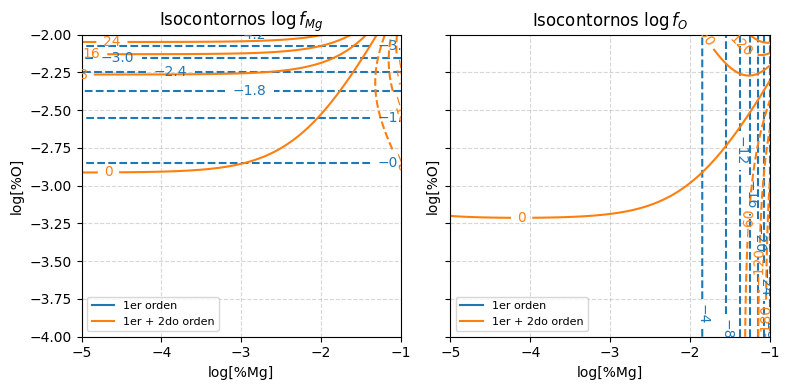

In [14]:
# gráficos de superficie de respuesta en 3D
fig2, ax2 = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

# efecto de coefs. de 1er orden
surf11 = ax2[0].contour(logMg, logO, log_fMg1, colors='C0')
ax2[0].clabel(surf11)
surf21 = ax2[1].contour(logMg, logO, log_fO1, colors='C0')
ax2[1].clabel(surf21)

# efecto de coefs. de 1er y 2do orden
surf21 = ax2[0].contour(logMg, logO, log_fMg1+log_fMg2, colors='C1')
ax2[0].clabel(surf21)
surf22 = ax2[1].contour(logMg, logO, log_fO1+log_fO2, colors='C1')
ax2[1].clabel(surf22)

ax2[0].set_title(r'Isocontornos $\log f_{Mg}$')
ax2[1].set_title(r'Isocontornos $\log f_O$')
for i in range(2):
    ax2[i].set(xlabel='log[%Mg]', ylabel='log[%O]')
    ax2[i].plot([],[],ls='-', color='C0', label='1er orden')
    ax2[i].plot([],[],ls='-', color='C1', label='1er + 2do orden')
    ax2[i].legend(loc='lower left', fontsize=8)
    ax2[i].grid(ls='--', which='both', alpha=0.5)
fig2.tight_layout()
plt.show()

## 2.4 Cálculo de equilibrio de desoxidación

### 2.4.1 Escritura de ecuación de equilibrio para optimización numérica

$$ \varepsilon = \log h_{Mg} +  \log h_{O} - \log a_{MgO} - \log K_{MgO}$$

$$ \mathrm{Encontrar: \quad}\varepsilon \rightarrow 0$$

In [15]:
def optFun_MgO(pctO, *params):
    pctMg, T, aMgO, order = params # unpacking of parameters

    log_K = logK_Mg(T)
    log_aMgO = np.log10(aMgO)
        
    if order == 0:
        log_fMg = 0
        log_fO  = 0
    elif order == 1:
        log_fMg = e_Mg_Mg(T)*pctMg + e_Mg_O(T)*pctO
        log_fO  = e_O_Mg(T)*pctMg  + e_O_O(T)*pctO
    elif order == 2:
        log_fMg = e_Mg_Mg(T)*pctMg + e_Mg_O(T)*pctO         \
            + r_Mg_Mg(T)*pctMg**2 + r_Mg_O(T)*pctO**2 + r_Mg_MgO(T)*pctMg*pctO
        log_fO = e_O_Mg(T)*pctMg  + e_O_O(T)*pctO            \
           + r_O_Mg(T)*pctMg**2 + + r_O_O(T)*pctO**2 + r_O_MgO(T)*pctMg*pctO
    else:
        valid = [0, 1, 2]
        raise ValueError(f"order: {order} is not valid, choose either {valid }")
    eps = log_fMg + np.log10(pctMg) + log_fO + np.log10(pctO) \
        - log_aMgO - log_K
    return eps

### 2.4.2 Procedimiento de optimización numérica de la ecuación de equilibrio

La optimización numérica para encontrar la combinación de parámetros de tal forma que $\varepsilon \rightarrow 0$ se lleva a cabo utilizando la función `fsolve` de la librería `scipy.optimize`.

In [16]:
# Parámetros para cálculos de curvas de equilibrio
T = 1873 # Temperatura [K]
Mgpcts = np.logspace(-4, 1, 100) # rango [%Mg]
aMgO = 1 # actividad termodinámica producto de desoxidación
orders = [0, 1, 2] # orden parametros interacción

Opcts = np.zeros(shape=(len(Mgpcts), len(orders)))
thres = 3e-3 # umbral de corte

In [17]:
# Encontrando valores de oxígeno en equilibrio por optimización numérica
for i, order in enumerate(orders):
    solList = [] # lista para guardar resultados de cada optimización
    for Mgpct in Mgpcts:
        params = (Mgpct, T, aMgO, order) # argumentos de la función a optimizar
        wO = fsolve(deox.optFun_MgO, x0=1e-8, args=params) # optimización
        solList.append(float(wO[0])) # agregar resultado de optimización a la lista
    Opcts[:, i] = np.array(solList) # agregar resultados de optimización a Array
Opcts[Opcts > thres] = np.NaN # limpiar de valores por encima del umbral

/tmp/ipykernel_37459/2508520349.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  wO = fsolve(deox.optFun_MgO, x0=1e-8, args=params) # optimización
/tmp/ipykernel_37459/2508520349.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  wO = fsolve(deox.optFun_MgO, x0=1e-8, args=params) # optimización


### 2.4.3 Comparación gráfica de modelos y datos experimentales

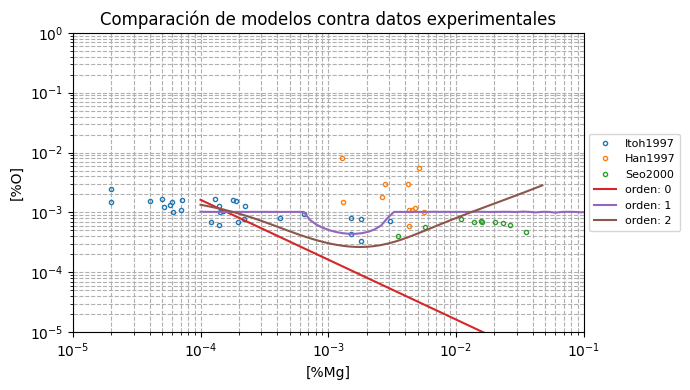

In [18]:
fig3, ax3 = plt.subplots(figsize=(7, 4))

# datos experimentales
for key in expDict.keys():
    x = expDict[key]['pctMg'].to_numpy()
    y = expDict[key]['pctO'].to_numpy()
    ax3.loglog(x, y, ls='', marker='.', markerfacecolor='None', label=key)

# datos de modelos
for i, order in enumerate(orders):
    x = Mgpcts
    y = Opcts[:, i]
    ax3.loglog(x, y, ls='-', marker='', label=f"orden: {order}")

# formato de gráfico
ax3.set_title('Comparación de modelos contra datos experimentales')
ax3.set(xlabel='[%Mg]', ylabel='[%O]',
        xscale='log', yscale='log',
        xlim=(1e-5, 1e-1), ylim=(1e-5, 1))
ax3.legend(ncol=1, loc='center left', fontsize=8, bbox_to_anchor=(1, 0.5))
ax3.grid(ls='--', which='both')
fig3.tight_layout()
plt.show()

## 2.5 Referencias

[[Ref.1](https://link.springer.com/article/10.1007%2Fs11663-015-0361-7)]
Zhang, L., Ren, Y., Duan, H., Yang, W., & Sun, L. (2015).   
Stability diagram of Mg-Al-O system inclusions in molten steel.    
Metallurgical and Materials Transactions B, 46(4), 1809-1825.   

[[Ref.2](https://www.sciencedirect.com/science/article/pii/S2238785421001873)]
Wang, H., Yu, P., Zhou, X., Wang, Y., & Lv, X. (2021).   
Three-dimensional stability diagram of Al–Mg–O inclusions in molten steel.    
Journal of Materials Research and Technology, 12, 43-52.

[[Ref.3](https://www.jstage.jst.go.jp/article/isijinternational1966/28/3/28_3_153/_pdf)]
Ichise, E., & Moro-Oka, A. (1988).   
Interaction Parameter in Liquid Iron Alloys.    
Transactions of the Iron and Steel Institute of Japan, 28(3), 153-163.   

[[Ref.4](https://www.researchgate.net/publication/233686082_The_Thermodynamics_of_Liquid_Dilute_Iron_Alloys)]
Sigworth, G. K., & Elliott, J. F. (1974).    
The thermodynamics of liquid dilute iron alloys.    
Metal science, 8(1), 298-310.     

[[Ref.5](https://link.springer.com/article/10.1007%2Fs11663-016-0640-y)]
Castro-Cedeño, E. I., Herrera-Trejo, M., Castro-Román, M., Castro-Uresti, F., & López-Cornejo, M. (2016).   
Evaluation of steel cleanliness in a steel deoxidized using Al.   
Metallurgical and Materials Transactions B, 47(3), 1613-1625.